In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data
stores = pd.read_csv('stores_test.csv')
stores = stores[['store_id', 'cust_num', 'tran_num', 'revenue', 'cust_label_0', 'cust_label_1', 'cust_label_2']]
stores.columns = ['store_id', 'cust_num', 'tran_num', 'sum_of_sales','cust_cherry_picker_rev (%)', 'cust_loyal_rev (%)', 'cust_weekend_rev (%)']

In [5]:
stores.describe()

,store_id,cust_num,tran_num,sum_of_sales,cust_cherry_picker_rev (%),cust_loyal_rev (%),cust_weekend_rev (%)
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,442.983294,125.463007,6755.517900,176948.122554,0.258616,0.347429,0.179689
std,195.520498,88.767049,4355.850855,128640.829726,0.105117,0.138096,0.089462
min,137.000000,6.000000,10.000000,472.180000,0.000000,0.038171,0.000000
25%,279.000000,75.000000,4037.500000,104417.500000,0.186862,0.254032,0.116585
50%,399.000000,104.000000,5802.000000,146541.370000,0.251594,0.334932,0.173882
75%,594.000000,150.000000,8359.000000,216481.615000,0.323339,0.426604,0.237578
max,999.000000,836.000000,30357.000000,955668.719999,0.762818,0.782221,0.517474


In [8]:
# Data Preprocessing
# Normalization: based on the varaince and range of each feature
# take log transformation for features that have high variance and range, and normalization for features have low variance and range
# wknd_trans, cust_25, cust_50, tran_dist_25

import math 
from sklearn import preprocessing

stores['cust_num_log'] = stores['cust_num'].apply(math.log)
stores['tran_num_log'] = stores['tran_num'].apply(math.log)
stores['sum_of_sales_log'] = stores['sum_of_sales'].apply(math.log)


In [9]:
# Standardization
features = stores.columns.tolist()

# standarize all columns
features_std = [feature for feature in features if feature not in ['store_id','cust_num', 'tran_num', 'sum_of_sales']]
scaler = preprocessing.StandardScaler().fit(stores[features_std])
stores_std = scaler.transform(stores[features_std])

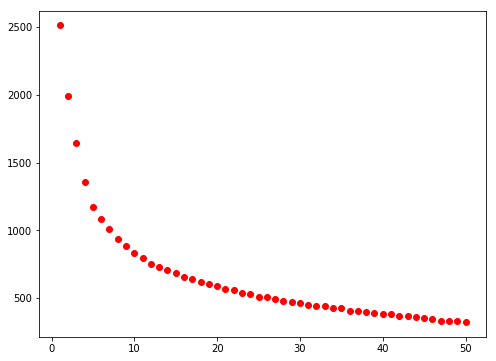

The best K sugest:  5


In [10]:
# K-kmeans clustering

from sklearn.cluster import KMeans

cl = 50
# set threshold at 10%, if as k increases
corte = 0.1
# set a number for cost function
anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        # start with k-means++
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(stores_std)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    # Elbow method for selecting the optimal number of clusters
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): 
        K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

print('The best K sugest: ', K_best)

In [11]:
# Use k=4 to run model again
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

model = model.fit(stores_std)

labels = model.labels_

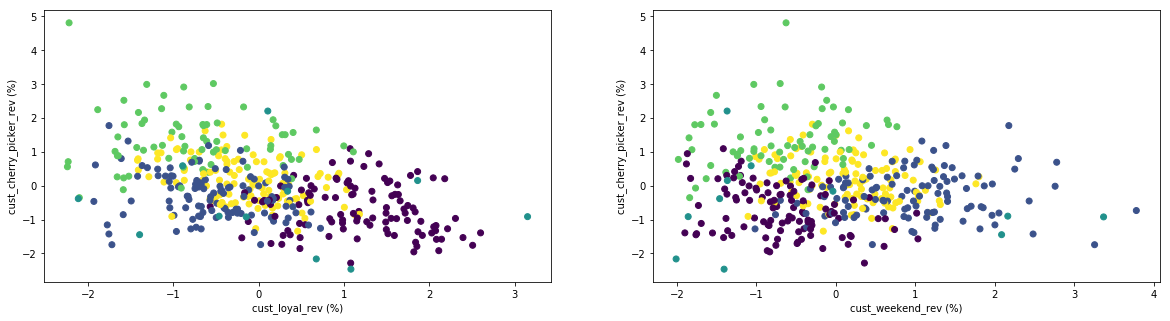

In [12]:
# And we'll visualize it:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = stores_std[:,1], y = stores_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[1])
ax.set_ylabel(features_std[0])
ax = fig.add_subplot(122)
plt.scatter(x = stores_std[:,2], y = stores_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[2])
ax.set_ylabel(features_std[0])

plt.show()

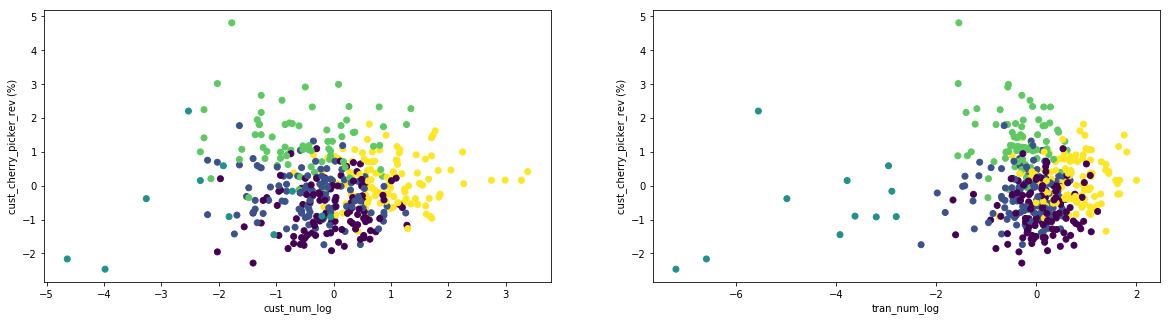

In [13]:
# And we'll visualize it:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = stores_std[:,3], y = stores_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[3])
ax.set_ylabel(features_std[0])
ax = fig.add_subplot(122)
plt.scatter(x = stores_std[:,4], y = stores_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[4])
ax.set_ylabel(features_std[0])

plt.show()

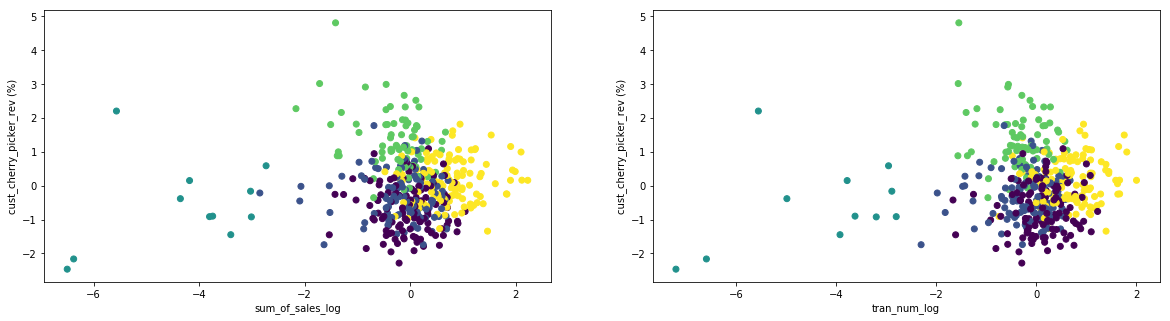

In [14]:
# And we'll visualize it:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = stores_std[:,5], y = stores_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[5])
ax.set_ylabel(features_std[0])
ax = fig.add_subplot(122)
plt.scatter(x = stores_std[:,4], y = stores_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[4])
ax.set_ylabel(features_std[0])

plt.show()

In [15]:
# Calcualte silhouette score when k = 4
from sklearn.metrics import silhouette_samples, silhouette_score
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

silhouette_score(X = stores_std, labels = model.fit_predict(stores_std))

0.2106681551460128

In [17]:
# Check center point of 4 clusters
print("Centers of each cluster:")
cent_transformed = scaler.inverse_transform(model.cluster_centers_)
print(pd.DataFrame(np.exp(cent_transformed[:, -3:]),columns=['cust_num', 'tran_num', 'sum_of_sales']))
print('-'*50)
print(pd.DataFrame(cent_transformed[:, :-3],columns=['cust_cherry_picker_rev (%)', 'cust_loyal_rev (%)', 'cust_weekend_rev (%)']))

Centers of each cluster:
     cust_num     tran_num   sum_of_sales
0   99.652430  5806.957333  131341.232705
1   83.447634  4361.393992  120253.581344
2   29.636277   123.328870    3375.000643
3   74.464230  3953.766708  105922.245523
4  184.651854  9929.342976  263620.468974
--------------------------------------------------
   cust_cherry_picker_rev (%)  cust_loyal_rev (%)  cust_weekend_rev (%)
0                    0.185104            0.507830              0.120387
1                    0.228293            0.274963              0.264531
2                    0.197361            0.375112              0.155606
3                    0.398659            0.242932              0.120579
4                    0.274791            0.327381              0.194410


In [21]:
# Count of labels
pd.Series(labels).value_counts()

4    118
1    109
0    109
3     72
2     11
dtype: int64

In [22]:
stores.describe()

,store_id,cust_num,tran_num,sum_of_sales,cust_cherry_picker_rev (%),cust_loyal_rev (%),cust_weekend_rev (%),cust_num_log,tran_num_log,sum_of_sales_log
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,442.983294,125.463007,6755.517900,176948.122554,0.258616,0.347429,0.179689,4.647316,8.576238,11.825736
std,195.520498,88.767049,4355.850855,128640.829726,0.105117,0.138096,0.089462,0.615921,0.871645,0.873278
min,137.000000,6.000000,10.000000,472.180000,0.000000,0.038171,0.000000,1.791759,2.302585,6.157360
25%,279.000000,75.000000,4037.500000,104417.500000,0.186862,0.254032,0.116585,4.317488,8.303381,11.556152
50%,399.000000,104.000000,5802.000000,146541.370000,0.251594,0.334932,0.173882,4.644391,8.665958,11.895063
75%,594.000000,150.000000,8359.000000,216481.615000,0.323339,0.426604,0.237578,5.010635,9.031084,12.285255
max,999.000000,836.000000,30357.000000,955668.719999,0.762818,0.782221,0.517474,6.728629,10.320782,13.770167


In [24]:
# Add the label column in the dataframe
t = pd.concat([pd.Series(labels), stores], axis = 1, ignore_index = True)
t = t.iloc[:, :8]
t.columns = ['label', 'store_id', 'cust_num', 'tran_num', 'sum_of_sales', 
      'cust_cherry_picker_rev (%)', 'cust_loyal_rev (%)',
       'cust_weekend_rev (%)']

In [28]:
# Assign labels
t.loc[t.label == 0, 'label'] = 'loyal'
t.loc[t.label == 1, 'label'] = 'weeknd'
t.loc[t.label == 2, 'label'] = 'outlier'
t.loc[t.label == 3, 'label'] = 'cherry_picker'
t.loc[t.label == 4, 'label'] = 'best'

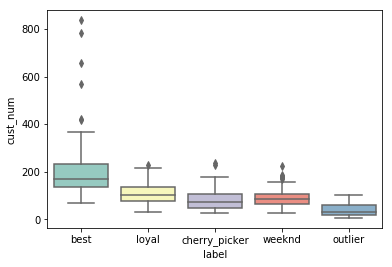

In [30]:
# Customer number by cluster
sns.boxplot(x = "label", y = 'cust_num', data = t, order = ['best', 'loyal', 'cherry_picker', 'weeknd', 'outlier'], \
            palette = "Set3")

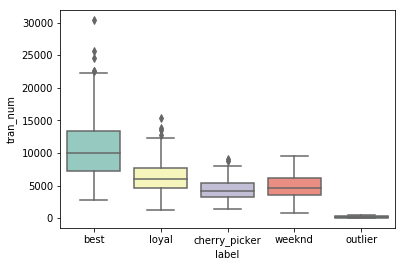

In [31]:
# Transaction number by cluster
sns.boxplot(x = "label", y = 'tran_num', data = t, order = ['best', 'loyal', 'cherry_picker', 'weeknd', 'outlier'], \
            palette = "Set3")

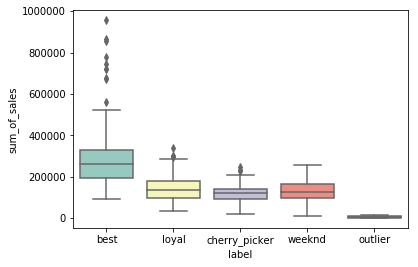

In [32]:
# total sales by cluster
sns.boxplot(x = "label", y = 'sum_of_sales', data = t, order = ['best', 'loyal', 'cherry_picker', 'weeknd', 'outlier'], \
            palette = "Set3")

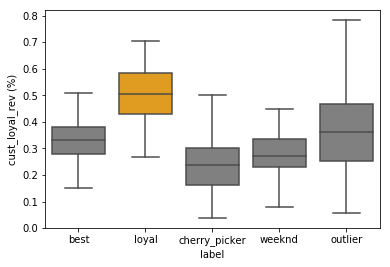

In [33]:
# Percentage of loyal customers by cluster
my_pal = {'best': "grey", 'loyal': "orange", 'cherry_picker':"grey", 'weeknd':"grey", 'outlier':"grey"}
sns.boxplot(x = "label", y = 'cust_loyal_rev (%)', data = t, order = ['best', 'loyal', 'cherry_picker', 'weeknd', 'outlier'], \
            palette = my_pal)

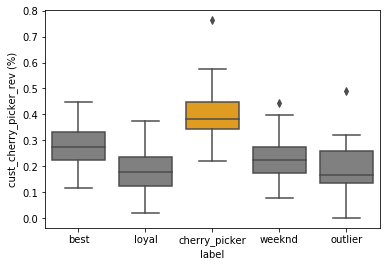

In [35]:
# Percentage of cherry-pickers by cluster
my_pal = {'best': "grey", 'loyal': "grey", 'cherry_picker':"orange", 'weeknd':"grey", 'outlier':"grey"}
sns.boxplot(x = "label", y = 'cust_cherry_picker_rev (%)', data = t, order = ['best', 'loyal', 'cherry_picker', 'weeknd', \
                                                                              'outlier'], palette = my_pal)

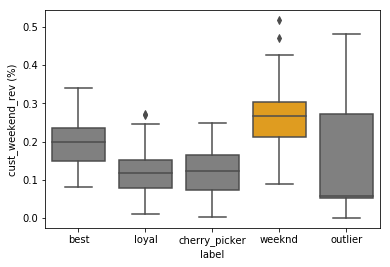

In [36]:
# Percentage of weekend customers by cluster
my_pal = {'best': "grey", 'loyal': "grey", 'cherry_picker':"grey", 'weeknd':"orange", 'outlier':"grey"}
sns.boxplot(x = "label", y = 'cust_weekend_rev (%)', data = t, order = ['best', 'loyal', 'cherry_picker', \
                                                                        'weeknd', 'outlier'], palette = my_pal)